### Importación de módulos

In [1]:
# Cargo el módulo de numpy
#-------------------------
import numpy as np
import time
import matplotlib.pyplot as plt

### Levantar datos de disco

####  CASO 1 entrada / 1 salida

In [2]:
# Definición de la clase para levantar (y dividir) los datos
# NOTA: Para un solo dato de entrada y una sola salida
#===========================================================
class Data(object):
    def __init__(self, path):
        self.dataset = self._build_dataset(path)
        
    def _build_dataset(self, path):
        structure = [('X', np.float),
                     ('y', np.float)]

        with open(path, encoding="utf8") as data_csv:

            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1])) # add here + 10 in second value
                        for i, line in enumerate(data_csv) if i != 0)
            embeddings = np.fromiter(data_gen, structure)

        return embeddings

    def split(self, percentage): # 0.8
        X = self.dataset['X']
        y = self.dataset['y']

        # X.shape[0] -> 10 (filas)

        permuted_idxs = np.random.permutation(X.shape[0])

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
                    #[9,0]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test  

#### CASO 2 entradas / 1 salida

In [2]:
# Definición de la clase para levantar (y dividir) los datos
# NOTA: Para dos datos de entrada y una sola salida
#===========================================================
class Data(object):
    def __init__(self, path):
        self.dataset = self._build_dataset(path)
    
    def _build_dataset(self, path):
        # Armo una estructura de datos para guardarlos ahí
        #-------------------------------------------------
        structure = [('X1', np.float),
                     ('X2', np.float),
                     ('y', np.int)]
        
        # Abro el archivo lo recorro llenando la estructura creada línea a línea
        #-----------------------------------------------------------------------
        with open(path, encoding="utf8") as data_csv:
            # A la estructura (data_gen) hay que armarla según lo que figure en el archivo
            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1]), np.int(line.split(',')[2])) # add here + 10 in second value
                        for i, line in enumerate(data_csv) if i != 0)
            embeddings = np.fromiter(data_gen, structure)

        return embeddings
    
    # Separo los los datos (train y test)
    #------------------------------------
    def split(self, percentage): # 0.8 en general
        X = self.dataset[['X1', 'X2']]
        y = self.dataset['y']
        
        # Permutamos los datos de entrada (asumimos que vienen en columna)
        # Es decir, cada fila sería una ocurrencia distinta
        #-----------------------------------------------------------------
        permuted_idxs = np.random.permutation(len(X)) #len me da la dimensión mayor
        
        # Separamos en Train (80%) y Test (20%)
        #--------------------------------------
        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]
        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]
        
        return X_train, X_test, y_train, y_test

        # Separamos en Train (70%), Test (20%) y Validation (10%)
        #--------------------------------------------------------
        #... train_idxs = permuted_idxs[0:int(percentage * X1.shape[0])]
#         test_idxs = permuted_idxs[int(percentage * X1.shape[0]):int(0.9 * X1.shape[0])]
#         valid_idxs = permuted_idxs[int(0.9 * X1.shape[0]):X1.shape[0]]

#         X_train = np.vstack((X1[train_idxs],X2[train_idxs]))
#         X_test = np.vstack((X1[test_idxs],X2[test_idxs]))
#         X_valid = np.vstack((X1[valid_idxs],X2[valid_idxs]))

#         y_train = y[train_idxs]
#         y_test = y[test_idxs]
#         y_valid = y[valid_idxs]
        
#         return X_train, X_test, X_valid, y_train, y_test, y_valid

### K-means

In [3]:
# Función que realiza prepara los datos e itera llamando a k_means_loop (la que hace las cuentas)
#------------------------------------------------------------------------------------------------
def k_means(X, n_clusters):
    # Armamos una matriz identidad con tamaño cantidad de centroides por cantidad de columnas de X
    centroids = np.eye(n_clusters, X.shape[1])
    print(centroids)
    # Para la cantidad de iteraciones indicadas
    for i in range(MAX_ITERATIONS):
        print("Iteration # {}".format(i))
        # Corremos el algoritmo de k-means
        centroids, cluster_ids = k_means_loop(X, centroids)
        print(centroids)
    return centroids, cluster_ids

# Este es el loop que realiza los cálculos
def k_means_loop(X, centroids):
    # Encontramos etiquetas para las filas en X basado en los valores de los centroides
    expanded_centroids = centroids[:, None]
    distances = np.sqrt(np.sum((expanded_centroids - X) ** 2, axis=2))  # Calculo las distancias (norma 2) de los centroides a cada vector de X
    arg_min = np.argmin(distances, axis=0) # Devuelve los índices de los vectores con menor distancia a los centroides
    
    # Recalcular los centroides
    for i in range(centroids.shape[0]):
        centroids[i] = np.mean(X[arg_min == i, :], axis=0)
    
    return centroids, arg_min

### PCA (por las dudas)

In [26]:
# Ahora comparamos contra la función embebida de PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)
x_std = StandardScaler(with_std=False).fit_transform(x)
pca.fit_transform(x_std)

ModuleNotFoundError: No module named 'sklearn'

### Regresiones lineales

In [3]:
# Clase base de la que heredan las que vayamos implementando
#-----------------------------------------------------------
# Es conveniente tener una clase base de la que vayan heredando las demás. Siempre habrá un método fit
# y un método predict. Pero en esta clase base puede haber definiciones de atributos comunes a todas
#===========================================================
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented


class ConstantModel(BaseModel):
    # El modelo constante solo saca la media de los datos y devuelve ese valor
    # Es útil para comparar. Ningún modelo debería ser peor que este.
    #-------------------------------------------------------------------------
    def fit(self, X, Y):
        W = Y.mean()
        self.model = W

    def predict(self, X):
        # La "predicción" consiste en devolver la media para todos los valores
        return np.ones(len(X)) * self.model

# Modelo de la regresión lineal
#==============================
class LinearRegression(BaseModel):
    # Este modelo de regresión lineal ajusta únicamente la pendiente, no contempla la ordenada al origen
    def fit(self, X, y):
        # Verificamos si X es un vector o una matriz
        if len(X.shape) == 1:
            # Esta es una manera de escribir la pseudo-inversa (X'.X)^(-1).X'.y
            W = X.T.dot(y) / X.T.dot(X)
        else:
            # Y esta es la manera con matrices
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W

    def predict(self, X):
        return X.dot(self.model)
    
# Modelo que incluye la ordenada al origen (b)
# ============================================
class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        # En el caso de ajustar con ordenada al origen le agregamos la columna de b con unos
        # (Le agrega la fila abajo y luego traspongo --> Vectores columna)
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        return X_expanded.dot(self.model)

### Gradientes descendentes

In [4]:
def gradient_descent(X_train, y_train, lr=0.01, amt_epochs=100):
    """
    lr: learning rate
    amt_epochs: cantidad de iteraciones
    
    shapes: 
        X_t: nxm
        Y_y: nx1
        W: mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    # print('X.shape:{}x{}\n'.format(n,m))
        
    # Inicializamos los pesos
    W = np.random.randn(m).reshape(m,1)
    print('W_inicial_{}'.format(W.reshape(-1)))
    
    for i in range(amt_epochs):
        # Calculo la estimación
        #y_hat=X_train*W
        y_hat=np.matmul(X_train,W)
        
        # Calculo el error
        error=y_train-y_hat
        
        # Calculo el gradiente
        grad_sum = np.sum(error*X_train,axis=0)
        grad_mul =-2/n*grad_sum  #1xm
        gradient = np.transpose(grad_mul).reshape(-1,1) #mx1
        
        # Actualizo el valor
        W = W - (lr*gradient)
    
    return W


def stochastic_gradient_descent(X_train, y_train, lr=0.01, amt_epochs=100):
    """
    lr: learning rate
    amt_epochs: cantidad de iteraciones
    
    shapes: 
        X_t: nxm
        Y_y: nx1
        W: mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    # print('X.shape:{}x{}\n'.format(n,m))
        
    # Inicializamos los pesos
    W = np.random.randn(m).reshape(m,1)
    print('W_inicial_{}'.format(W.reshape(-1)))
    
    for i in range(amt_epochs):
        idx=np.random.permutation(X_train.shape[0])
        X_train = X_train[idx]
        y_train = y_train[idx]
        
        for j in range(n):
        
            # Calculo la estimación
            #y_hat=X_train*W
            y_hat=np.matmul(X_train[j].reshape(1,-1),W)

            # Calculo el error
            error=y_train[j]-y_hat

            # Calculo el gradiente
            grad_sum = error*X_train[j]
            grad_mul =-2/n*grad_sum  #1xm
            gradient = np.transpose(grad_mul).reshape(-1,1) #mx1

            # Actualizo el valor
            W = W - (lr*gradient)
    
    return W

def mini_batch_gradient_descent(X_train, y_train, lr=0.01, amt_epochs=100):
    """
    shapes:
        X_t = nxm
        y_t = nx1
        W = mx1
    """
    b = 16
    n = X_train.shape[0]
    m = X_train.shape[1]

    # initialize random weights
    W = np.random.randn(m).reshape(m, 1)

    for i in range(amt_epochs):
        idx = np.random.permutation(X_train.shape[0])
        X_train = X_train[idx]
        y_train = y_train[idx]

        batch_size = int(len(X_train) / b)
        for i in range(0, len(X_train), batch_size):
            end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
            batch_X = X_train[i: end]
            batch_y = y_train[i: end]

            prediction = np.matmul(batch_X, W)  # nx1
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_X, axis=0)
            grad_mul = -2/n * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

            W = W - (lr * gradient)

    return W


def mini_batch_logistic_regression(X_train, y_train, lr=0.01, amt_epochs=100):
    """
    shapes:
        X_t = nxm
        y_t = nx1
        W = mx1
    """
    b = 16
    n = X_train.shape[0]
    m = X_train.shape[1]

    # initialize random weights
    W = np.random.randn(m).reshape(m, 1)

    for i in range(amt_epochs):
        idx = np.random.permutation(X_train.shape[0])
        X_train = X_train[idx]
        y_train = y_train[idx]

        batch_size = int( len(X_train) / b)
        for i in range(0, len(X_train), batch_size):
            end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
            batch_X = X_train[i: end]
            batch_y = y_train[i: end]
            prediction = 1/(1+np.exp(-np.matmul(batch_X, W))) #Ojo que no es la predicción posta!!
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_X, axis=0)
            grad_mul = -2/b * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

            W = W - (lr * gradient)

    return W

def sin_fitting_example():
    # y = sin(x)
    amt_points = 36
    x = np.linspace(0, 360, num=amt_points)
    y = np.sin(x * np.pi / 180.)
    noise = np.random.normal(0, .1, y.shape)
    noisy_y = y + noise

    X_train = x
    y_train = noisy_y

    regression = LinearRegression()

    # linear
    X_linear = np.vstack((X_train, np.ones(len(X_train)))).T
    regression.fit(X_linear, y_train.reshape(-1, 1))
    W_linear = regression.model
    y_linear = W_linear[0]*x + W_linear[1]

    # quadratic
    X_quadratic = np.vstack((np.power(X_train, 2), X_train, np.ones(len(X_train)))).T
    regression.fit(X_quadratic, y_train.reshape(-1, 1))
    W_quadratic = regression.model
    y_quadratic = W_quadratic[0] * np.power(x, 2) + W_quadratic[1] * x + W_quadratic[2]

    # cubic
    X_cubic = np.vstack((np.power(X_train, 3), np.power(X_train, 2), X_train, np.ones(len(X_train)))).T
    regression.fit(X_cubic, y_train.reshape(-1, 1))
    W_cubic = regression.model
    y_cubic = W_cubic[0] * np.power(x, 3) + W_cubic[1] * np.power(x, 2) + W_cubic[2] * x + W_cubic[3]

    # X10
    X_10 = np.vstack((np.power(X_train, 10), np.power(X_train, 9), np.power(X_train, 8),
                      np.power(X_train, 7), np.power(X_train, 6), np.power(X_train, 5),
                      np.power(X_train, 4), np.power(X_train, 3), np.power(X_train, 2),
                      X_train, np.ones(len(X_train)))).T
    regression.fit(X_10, y_train.reshape(-1, 1))
    W_10 = regression.model
    y_10 = W_10[0] * np.power(x, 10) + W_10[1] * np.power(x, 9) + W_10[2] * np.power(x, 8) + \
           W_10[3] * np.power(x, 7) + W_10[4] * np.power(x, 6) + W_10[5] * np.power(x, 5) + \
           W_10[6] * np.power(x, 4) + W_10[7] * np.power(x, 3) + W_10[8] * np.power(x, 2) + \
           W_10[9] * x + W_10[10]

    # PLOTS
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.gca().set_title('Sin(x) - Fitting curves')

    # original
    plt.plot(x, noisy_y, 'o')

    # linear
    plt.plot(x, y_linear, '-')

    # quadratic
    plt.plot(x, y_quadratic, '-')

    # cubic
    plt.plot(x, y_cubic, '-')

    # 10 power
    plt.plot(x, y_10, '-')

    plt.legend(['noisy signal', 'linear', 'quadratic', 'cubic', '10th power'])
    plt.show()

### K-folds

In [5]:
def k_folds(X_train, y_train, k=5):
    l_regression = LinearRegression()
    error = MSE()

    chunk_size = int(len(X_train) / k)
    mse_list = []
    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        l_regression.fit(new_X_train, new_y_train)
        prediction = l_regression.predict(new_X_valid)
        mse_list.append(error(new_y_valid, prediction))

    mean_MSE = np.mean(mse_list)

    return mean_MSE

### Métricas

In [6]:
# Clases de métricas
#===================

# Clase madre
class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented

# Por ahora solo esta --> Error cuadrático medio
class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)
        
    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

class Precision(Metric):
    def __init__(self):
        Metric.__init__(self)
        
    def __call__(self, truth, prediction):
        
        # Encontramos los True Positive
        true_pos_mask = (prediction == 1) & (truth == 1)
        true_pos = true_pos_mask.sum()
        
        # Encontramos los False Positive
        false_pos_mask = (prediction == 1) & (truth == 0)
        false_pos = false_pos_mask.sum()
        
        return true_pos / (true_pos + false_pos)

class Recall (Metric):
    def __init__(self):
        Metric.__init__(self)
        
    def __call__(self, truth, prediction):
        
        # Encontramos los True Positive
        true_pos_mask = (prediction == 1) & (truth == 1)
        true_pos = true_pos_mask.sum()
        
        # Encontramos los False Negative
        false_neg_mask = (prediction == 0) & (truth == 1)
        false_neg = false_neg_mask.sum()
        
        return true_pos / (true_pos + false_neg)
        
class Accuracy (Metric):
    def __init__(self):
        Metric.__init__(self)
        
    def __call__(self, truth, prediction):
        
        # Encontramos los True Positive
        true_pos_mask = (prediction == 1) & (truth == 1)
        true_pos = true_pos_mask.sum()
        
        # Encontramos los False Positive
        false_pos_mask = (prediction == 1) & (truth == 0)
        false_pos = false_pos_mask.sum()
        
        # Encontramos los True Negative
        true_neg_mask = (prediction == 0) & (truth == 0)
        true_neg = true_neg_mask.sum() 
    
        # Encontramos los False Negative
        false_neg_mask = (prediction == 0) & (truth == 1)
        false_neg = false_neg_mask.sum()
    
        return (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

### Main

#### Examen Final - Intro a AI

##### Punto 2

- a) Obtener el dataset desde el siguiente link. La primera columna representa los datos de entrada y la segunda columna representa los datos de salida.

- b) Levantar el dataset en un arreglo de Numpy. 

- c) Graficar el dataset de manera tal que sea posible visualizar la nube de puntos.

- d) Partir el dataset en train (80%) y test (20%).


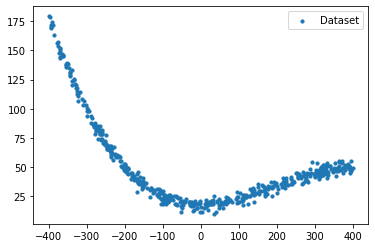

In [7]:
# b) Levantamos en un arreglo Numpy los datos
dataset = Data('../clase_8_dataset.csv')
# c) Para mostrarlos todos hago un "split mentiroso" al 100%. Todos los datos quedan en Train
X_train, X_test, y_train, y_test = dataset.split(1)
# Graficamos...
plt.scatter(X_train, y_train, s=10, label='Dataset')
plt.legend()
plt.show()
# d) Ahora sí particionamos el dataset en train (80%) y test (20%)
X_train, X_test, y_train, y_test = dataset.split(0.8)

#### Punto 3

Utilizar regresión polinómica para hacer “fit” sobre la nube de puntos del train. Para este ejercicio, se desea utilizar la fórmula cerrada de la optimización polinómica. El modelo es de la forma y = [Wn … W0] * [X^n    X^(n-1)    …    1]. 

- a) Para n = 1 (modelo lineal con ordenada al origen), hacer un fit del modelo utilizando K-FOLDS. Para K-FOLDS partir el train dataset en 5 partes iguales, utilizar 4/5 para entrenar y 1/5 para validar. Informar el mejor modelo obtenido y el criterio utilizado para elegir dicho modelo (dejar comentarios en el código).

- b) Repetir el punto (a), para n = {2,3,4}. Computar el error de validación y test del mejor modelo para cada n.

- c) Elegir el polinomio que hace mejor fit sobre la nube de puntos y explicar el criterio seleccionado (dejar comentarios en el código). 

- d) Graficar el polinomio obtenido y el dataset de test


In [8]:
# a) K-folds para el caso lineal
# n=1: Caso Lineal
X_linear = np.vstack((X_train, np.ones(len(X_train)))).T
mean_MSE = k_folds(X_linear, y_train.reshape(-1, 1), k=5)
print("Error de ajuste n=1: {}".format(mean_MSE))

# b) K-folds para los demás órdenes
# n=2: Caso cuadratico
X_quadratic = np.vstack((np.power(X_train, 2), X_train, np.ones(len(X_train)))).T
mean_MSE = k_folds(X_quadratic, y_train, k=5)
print("Error de ajuste n=2: {}".format(mean_MSE))

# n=3: Caso cúbico
X_cubic = np.vstack((np.power(X_train, 3), np.power(X_train, 2), X_train, np.ones(len(X_train)))).T
mean_MSE = k_folds(X_cubic, y_train, k=5)
print("Error de ajuste n=3: {}".format(mean_MSE))

# n=4: Caso poly 4
X_4 = np.vstack((np.power(X_train, 4), np.power(X_train, 3), np.power(X_train, 2), X_train, np.ones(len(X_train)))).T
mean_MSE = k_folds(X_4, y_train, k=5)
print("Error de ajuste n=4: {}".format(mean_MSE))

Error de ajuste n=1: 925.676671178207
Error de ajuste n=2: 101.69352938450034
Error de ajuste n=3: 8.739423453141244
Error de ajuste n=4: 8.776601235461433


#### c) Conclusión:: 
De estos resultados podemos ver que el error de ajuste para n=3 es el más pequeño (inclusive mejor que n=4). Tomamos entonces n=3 para seguir. Todo esto está basado en la técnica de K-folds que va partiendo el train dataset en las partes que se le indique (en nuestro caso k=5) y encontrando un promedio de los errores cuadráticos medios entrenando sobre 4/5 de las particiones y validando sobre 1/5, para todas las combinaciones.

En resumen, como dijimos, tomamos n=3 para seguir

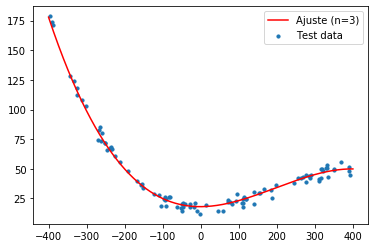

In [12]:
# d) Graficamos el polinomio y el dataset de test
# n=3: Caso cúbico
X_cubic = np.vstack((np.power(X_train, 3), np.power(X_train, 2), X_train, np.ones(len(X_train)))).T

x = np.linspace(-400, 400, num=800)

regression = LinearRegression()
regression.fit(X_cubic, y_train.reshape(-1, 1))
W_cubic = regression.model
y_cubic = W_cubic[0] * np.power(x, 3) + W_cubic[1] * np.power(x, 2) + W_cubic[2] * x + W_cubic[3]

# Graficamos
plt.scatter(X_test, y_test, s=10, label='Test data')
plt.plot(x, y_cubic, 'r-')
plt.legend(['Ajuste (n=3)','Test data'])
plt.show()


#### Punto 4: Para el mejor modelo seleccionado en (3c) (el mejor “n”), hacer la optimización utilizando Mini-Batch Gradient Descent (partir el train dataset en 4/5 para entrenar y 1/5 para validar).

- a) Para cada epoch, calcular el error de train y el error de validation.
- b) Graficar el error de train y el error de validación en función del número de epoch.
- c) Comparar los resultados obtenidos para el modelo entrenado con Mini-Batch, contra el modelo obtenido en (3c).

In [60]:
#==============================
# Código que tenía para pruebas
#==============================

# if __name__ == '__main__':
#     dataset = Data('../income.data.csv')

#     X_train, X_test, y_train, y_test = dataset.split(0.8)

#     linear_regression = LinearRegression()
#     linear_regression.fit(X_train, y_train)
#     lr_y_hat = linear_regression.predict(X_test)

#     linear_regression_b = LinearRegressionWithB()
#     linear_regression_b.fit(X_train, y_train)
#     lrb_y_hat = linear_regression_b.predict(X_test)

#     constant_model = ConstantModel()
#     constant_model.fit(X_train, y_train)
#     ct_y_hat = constant_model.predict(X_test)

#     mse = MSE()
#     lr_mse = mse(y_test, lr_y_hat)
#     lrb_mse = mse(y_test, lrb_y_hat)
#     ct_mse = mse(y_test, ct_y_hat)

#     x_plot = np.linspace(0, 10, 10)
#     lr_y_plot = linear_regression.model * x_plot
#     lrb_y_plot = linear_regression_b.model[0] * x_plot + linear_regression_b.model[1]

#     # gradient descent
#     print('\n\n\nGRADIENT DESCENT VS LINEAR REGRESSION')
#     lr_1 = 0.001
#     amt_epochs_1 = 1000
#     start = time.time()
#     W_manual = gradient_descent(X_train.reshape(-1, 1), y_train.reshape(-1, 1), lr=lr_1, amt_epochs=amt_epochs_1)
#     time_1 = time.time() - start
#     W_real = linear_regression.model
#     print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.format(W_manual.reshape(-1), W_real, time_1))

#     # gradient descent
#     print('\n\n\nGRADIENT DESCENT VS LINEAR REGRESSION WITH B')
#     X_expanded = np.vstack((X_train, np.ones(len(X_train)))).T
#     lr_2 = 0.001
#     amt_epochs_2 = 100000
#     start = time.time()
#     W_manual = gradient_descent(X_expanded, y_train.reshape(-1, 1), lr=lr_2, amt_epochs=amt_epochs_2)
#     time_2 = time.time() - start
#     W_real = linear_regression_b.model
#     print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.
#           format(W_manual.reshape(-1), W_real, time_2))

#     # gradient descent
#     print('\n\n\nSTOCHASTIC GRADIENT DESCENT VS LINEAR REGRESSION WITH B')
#     X_expanded = np.vstack((X_train, np.ones(len(X_train)))).T
#     lr_3 = 0.05
#     amt_epochs_3 = 1000
#     start = time.time()
#     W_manual = stochastic_gradient_descent(X_expanded, y_train.reshape(-1, 1), lr=lr_3, amt_epochs=amt_epochs_3)
#     time_3 = time.time() - start
#     W_real = linear_regression_b.model
#     print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.
#           format(W_manual.reshape(-1), W_real, time_3))

#     # gradient descent
#     print('\n\n\nMINI BATCH GRADIENT DESCENT VS LINEAR REGRESSION WITH B')
#     X_expanded = np.vstack((X_train, np.ones(len(X_train)))).T
#     lr_4 = 0.05
#     amt_epochs_4 = 10000
#     start = time.time()
#     W_manual = mini_batch_gradient_descent(X_expanded, y_train.reshape(-1, 1), lr=lr_4, amt_epochs=amt_epochs_4)
#     time_4 = time.time() - start
#     W_real = linear_regression_b.model
#     print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.
#           format(W_manual.reshape(-1), W_real, time_4))

#     # PLOTS
#     plt.figure()
#     x_plot = np.linspace(1, 4, 4)
#     legend = ['GD', 'GD(B)', 'S-GD(B)', 'MB-GD(B)']

#     plt.subplot(1, 3, 1)
#     plt.gca().set_title('Learning Rate')
#     y_plot = [lr_1, lr_2, lr_3, lr_4]
#     plt.plot(x_plot[0], y_plot[0], 'o', x_plot[1], y_plot[1], 'o', x_plot[2], y_plot[2], 'o',
#              x_plot[3], y_plot[3], 'o')
#     plt.legend(legend)
#     for x, y in zip(x_plot, y_plot):
#         plt.text(x, y, str(y))

#     plt.subplot(1, 3, 2)
#     plt.gca().set_title('Epochs')
#     y_plot = [amt_epochs_1, amt_epochs_2, amt_epochs_3, amt_epochs_4]
#     plt.plot(x_plot[0], y_plot[0], 'o', x_plot[1], y_plot[1], 'o', x_plot[2], y_plot[2], 'o',
#              x_plot[3], y_plot[3], 'o')
#     plt.legend(legend)
#     for x, y in zip(x_plot, y_plot):
#         plt.text(x, y, str(y))

#     plt.subplot(1, 3, 3)
#     plt.gca().set_title('Time')
#     y_plot = [time_1, time_2, time_3, time_4]
#     plt.plot(x_plot[0], y_plot[0], 'o', x_plot[1], y_plot[1], 'o', x_plot[2], y_plot[2], 'o',
#              x_plot[3], y_plot[3], 'o')
#     plt.legend(legend)
#     for x, y in zip(x_plot, y_plot):
#         plt.text(x, y, str(y))

#     plt.show()

#     # sin fitting example
#     sin_fitting_example()

In [16]:
#==============================
# Código que tenía para pruebas
#==============================

# if __name__ == '__main__':
#     dataset = Data('../clase_6_dataset.txt')
#     print('Dataset loaded')
#     X_train, X_test, y_train, y_test = dataset.split(1)
#     print('Dataset split')

#     # gradient descent (es importante que tenga la columna de unos)
#     X_expanded = np.vstack((X_train['X1'], X_train['X2'], np.ones(len(X_train)))).T
#     lr = 0.001
#     amt_epochs = 50000
#     print('Training')
#     start = time.time()
#     W = mini_batch_logistic_regression(X_expanded, y_train.reshape(-1, 1), lr=lr,amt_epochs=amt_epochs)
#     time = time.time() - start
#     print('W: {}\nTime [s]: {}'.format(W.reshape(-1), time))

#     # PLOTS
#     # filter out the applicants that got admitted
#     admitted = X_train[y_train == 1]
#     # filter out the applicants that didn't get admission
#     not_admitted = X_train[y_train == 0]

#     # logistic regression
#     x_regression = np.linspace(30, 100, 70) # De 30 a 100, 70 valores equiespaciados
#     y_regression = (-x_regression*W[0] - W[2])/W[1]

#     # plots
#     plt.scatter(admitted['X1'], admitted['X2'], s=10, label='Admitted')
#     plt.scatter(not_admitted['X1'], not_admitted['X2'], s=10, label='Not Admitted')
#     plt.plot(x_regression, y_regression, '-', color='green', label='Regression')
#     plt.legend()
#     plt.show()

Dataset loaded
Dataset split
Training
W: [  0.12245323   0.11537612 -13.68000208]
Time [s]: 50.46697926521301
